In [2]:
import pandas as pd

# Đọc tệp CSV
file_path = "processed_dulieuxettuyendaihoc.csv"
df = pd.read_csv(file_path)

# 1. Sắp xếp dữ liệu điểm DH1 theo thứ tự tăng dần
dh1_sorted = df[['DH1']].sort_values(by='DH1')

# 2. Sắp xếp dữ liệu điểm DH2 tăng dần theo nhóm giới tính
dh2_sorted_by_gt = df[['GT', 'DH2']].sort_values(by=['GT', 'DH2'])

# 3. Tạo pivot-table thống kê DH1 theo KT
pivot_kt = df.pivot_table(values='DH1', index='KT', aggfunc=['count', 'sum', 'mean', 'median', 'min', 'max', 'std'])
pivot_kt['Q1'] = df.groupby('KT')['DH1'].quantile(0.25)
pivot_kt['Q2'] = df.groupby('KT')['DH1'].quantile(0.50)
pivot_kt['Q3'] = df.groupby('KT')['DH1'].quantile(0.75)

# 4. Tạo pivot-table thống kê DH1 theo KT và KV
pivot_kt_kv = df.pivot_table(values='DH1', index=['KT', 'KV'], aggfunc=['count', 'sum', 'mean', 'median', 'min', 'max', 'std'])
pivot_kt_kv['Q1'] = df.groupby(['KT', 'KV'])['DH1'].quantile(0.25)
pivot_kt_kv['Q2'] = df.groupby(['KT', 'KV'])['DH1'].quantile(0.50)
pivot_kt_kv['Q3'] = df.groupby(['KT', 'KV'])['DH1'].quantile(0.75)

# 5. Tạo pivot-table thống kê DH1 theo KT, KV và DT
pivot_kt_kv_dt = df.pivot_table(values='DH1', index=['KT', 'KV', 'DT'], aggfunc=['count', 'sum', 'mean', 'median', 'min', 'max', 'std'])
pivot_kt_kv_dt['Q1'] = df.groupby(['KT', 'KV', 'DT'])['DH1'].quantile(0.25)
pivot_kt_kv_dt['Q2'] = df.groupby(['KT', 'KV', 'DT'])['DH1'].quantile(0.50)
pivot_kt_kv_dt['Q3'] = df.groupby(['KT', 'KV', 'DT'])['DH1'].quantile(0.75)

# Hiển thị kết quả
print("Dữ liệu DH1 đã sắp xếp:")
print(dh1_sorted.head())
print("\nDữ liệu DH2 đã sắp xếp theo giới tính:")
print(dh2_sorted_by_gt.head())
print("\nPivot-table DH1 theo KT:")
print(pivot_kt)
print("\nPivot-table DH1 theo KT và KV:")
print(pivot_kt_kv)
print("\nPivot-table DH1 theo KT, KV và DT:")


Dữ liệu DH1 đã sắp xếp:
     DH1
53  1.00
43  1.25
72  1.50
5   1.50
87  1.75

Dữ liệu DH2 đã sắp xếp theo giới tính:
   GT   DH2
95  F  1.50
25  F  2.00
24  F  2.25
46  F  2.25
13  F  2.75

Pivot-table DH1 theo KT:
   count     sum      mean median   min   max       std      Q1    Q2     Q3
     DH1     DH1       DH1    DH1   DH1   DH1       DH1                     
KT                                                                          
A     49  163.50  3.336735   3.25  1.00  6.50  1.274296  2.2500  3.25  4.250
A1     6   17.50  2.916667   3.00  2.00  4.25  0.861201  2.1875  3.00  3.250
B      9   29.50  3.277778   3.50  1.75  4.50  0.823905  3.2500  3.50  3.750
C     14   79.25  5.660714   5.25  4.75  7.00  0.812209  5.0625  5.25  6.375
D1    22   84.25  3.829545   3.75  1.25  6.75  1.370146  3.0000  3.75  4.875

Pivot-table DH1 theo KT và KV:
       count    sum      mean median   min   max       std      Q1     Q2  \
         DH1    DH1       DH1    DH1   DH1   DH1       DH1 

PHAN 2

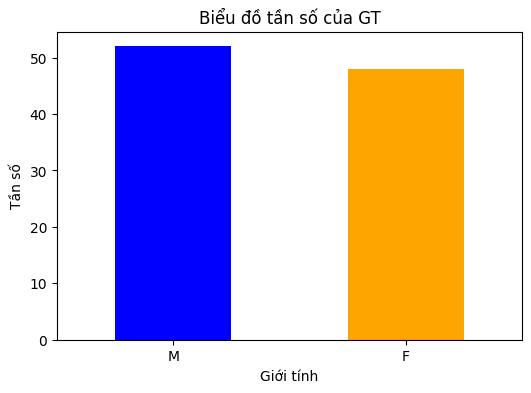

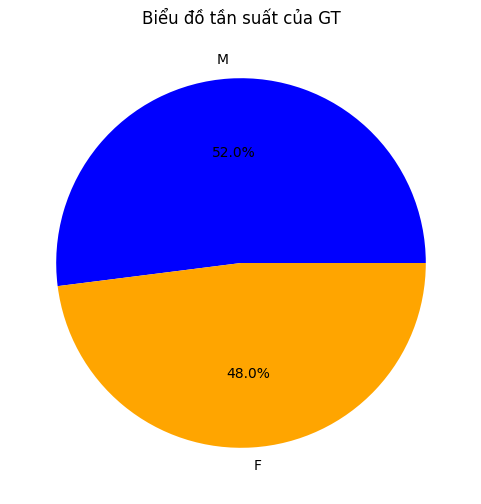

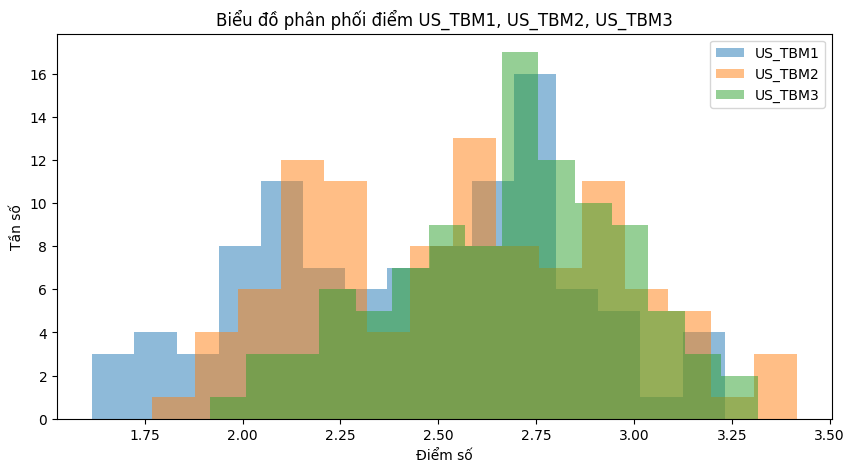

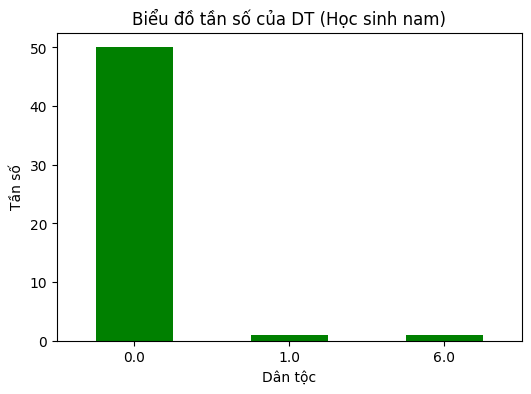

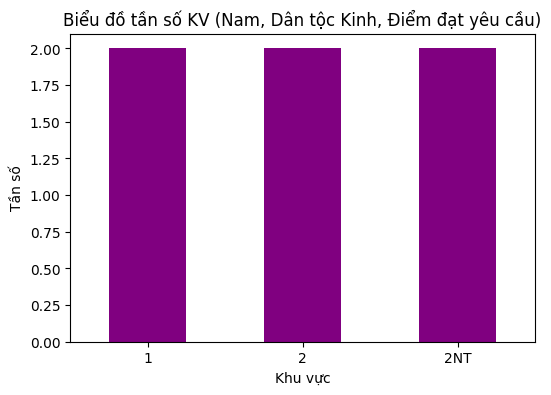

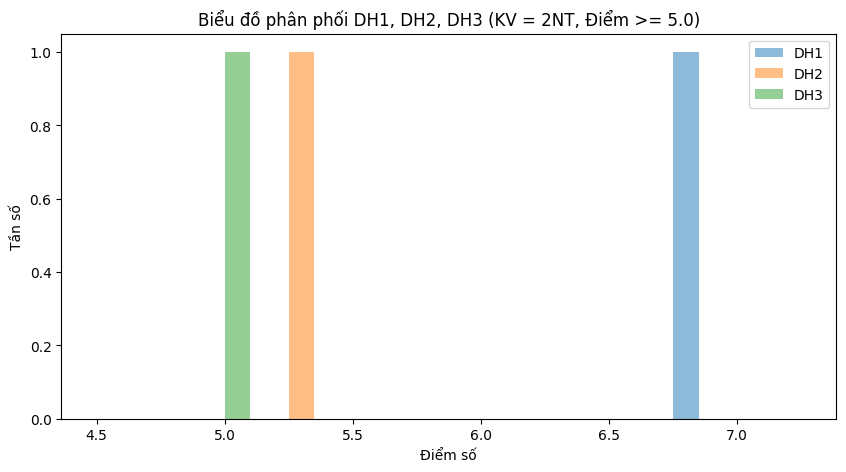

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
# Đọc tệp CSV
file_path = "processed_dulieuxettuyendaihoc.csv"
df = pd.read_csv(file_path)
#1. Lập bảng tần số và tần suất của GT
gt_counts = df['GT'].value_counts()
gt_frequencies = df['GT'].value_counts(normalize=True) * 100
# Vẽ biểu đồ tần số và tần suất của GT
plt.figure(figsize=(6,4))
gt_counts.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel("Giới tính")
plt.ylabel("Tần số")
plt.title("Biểu đồ tần số của GT")
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(6,6))
gt_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'])
plt.ylabel("")
plt.title("Biểu đồ tần suất của GT")
plt.show()
#2. Trình bày dữ liệu US_TBM1, US_TBM2, US_TBM3
us_tbm_columns = ['US_TBM1', 'US_TBM2', 'US_TBM3']
us_tbm_stats = df[us_tbm_columns].describe()
plt.figure(figsize=(10, 5))
for col in us_tbm_columns:
    df[col].plot(kind='hist', alpha=0.5, bins=15, label=col)
plt.xlabel("Điểm số")
plt.ylabel("Tần số")
plt.title("Biểu đồ phân phối điểm US_TBM1, US_TBM2, US_TBM3")
plt.legend()
plt.show()
#3. Trình bày dữ liệu DT với học sinh nam
dt_male_counts = df[df['GT'] == 'M']['DT'].value_counts()
plt.figure(figsize=(6, 4))
dt_male_counts.plot(kind='bar', color='green')
plt.xlabel("Dân tộc")
plt.ylabel("Tần số")
plt.title("Biểu đồ tần số của DT (Học sinh nam)")
plt.xticks(rotation=0)
plt.show()
#4. Trình bày dữ liệu KV với học sinh nam thuộc dân tộc Kinh và thỏa mãn điều kiện điểm
filtered_kv = df[(df['GT'] == 'M') & (df['DT'] == 0.0) & (df['DH1'] >= 5.0) & (df['DH2'] >= 4.0) & (df['DH3'] >= 4.0)]
kv_counts = filtered_kv['KV'].value_counts()
plt.figure(figsize=(6, 4))
kv_counts.plot(kind='bar', color='purple')
plt.xlabel("Khu vực")
plt.ylabel("Tần số")
plt.title("Biểu đồ tần số KV (Nam, Dân tộc Kinh, Điểm đạt yêu cầu)")
plt.xticks(rotation=0)
plt.show()
#5. Trình bày dữ liệu DH1, DH2, DH3 >= 5.0 và thuộc KV = 2NT
filtered_dh = df[(df['KV'] == '2NT') & (df['DH1'] >= 5.0) & (df['DH2'] >= 5.0) & (df['DH3'] >= 5.0)]
plt.figure(figsize=(10, 5))
for col in ['DH1', 'DH2', 'DH3']:
    filtered_dh[col].plot(kind='hist', alpha=0.5, bins=10, label=col)
plt.xlabel("Điểm số")
plt.ylabel("Tần số")
plt.title("Biểu đồ phân phối DH1, DH2, DH3 (KV = 2NT, Điểm >= 5.0)")
plt.legend()
plt.show()

PHAN 3

             GT
XL1 XL2 XL3    
G   G   G     1
K   G   K     1
    K   K    20
        TB    1
    TB  K     2
TB  K   K     8
        TB    1
    TB  K     3
        TB    6
Y   TB  K     1
        TB    3
    Y   TB    1


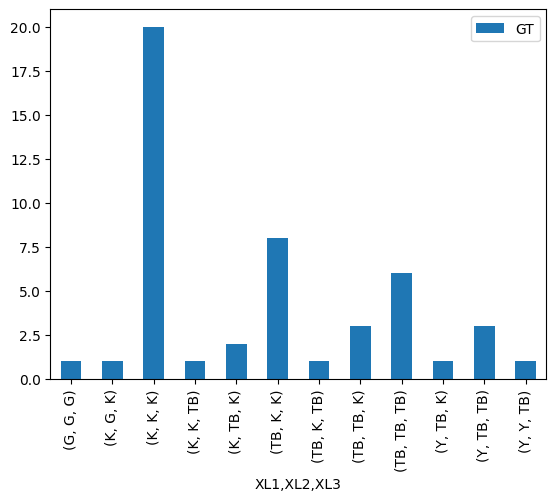

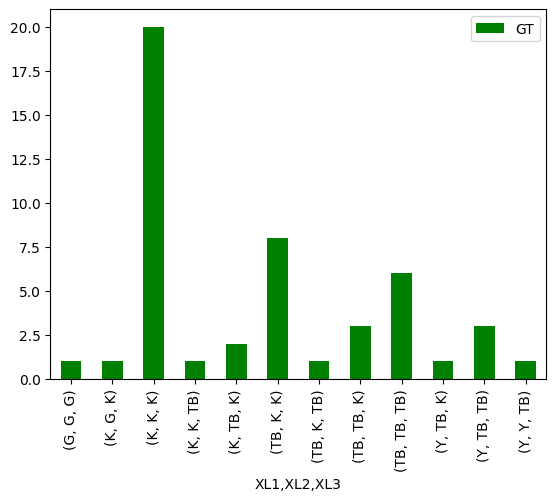

    KT KV  KQXT
16   A  1   0.0
17   A  1   0.0
18   A  1   0.0
19   A  2   0.0
20   A  1   0.0
31   A  1   0.0
33   A  1   0.0
35   A  2   0.0
36   A  1   0.0
37   A  2   0.0
38   A  1   0.0
39  A1  1   0.0
41   A  2   0.0
45   A  2   0.0
47   A  2   1.0
50   A  1   0.0
51   A  1   0.0
53   A  1   0.0
56   A  1   1.0
57  A1  1   0.0
60   A  1   0.0
61   A  1   0.0
62   A  1   0.0
63   A  1   0.0
64   A  2   0.0
65   A  1   0.0
67   B  1   0.0
68   B  1   0.0
69   B  1   0.0
70   A  2   0.0
71   B  1   0.0
72   A  1   0.0
73   A  1   0.0
74   A  1   0.0
75   A  1   0.0
77   B  1   0.0
78   B  1   0.0
81   A  1   0.0
82   B  1   0.0
83   B  1   0.0
84   A  1   1.0
87   A  1   0.0
88   A  1   0.0
89   A  1   0.0
90   A  2   1.0
92   A  1   0.0
93   A  1   0.0
94   A  1   0.0


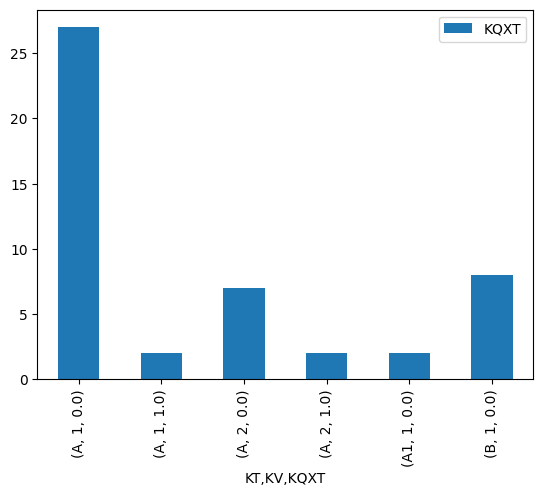

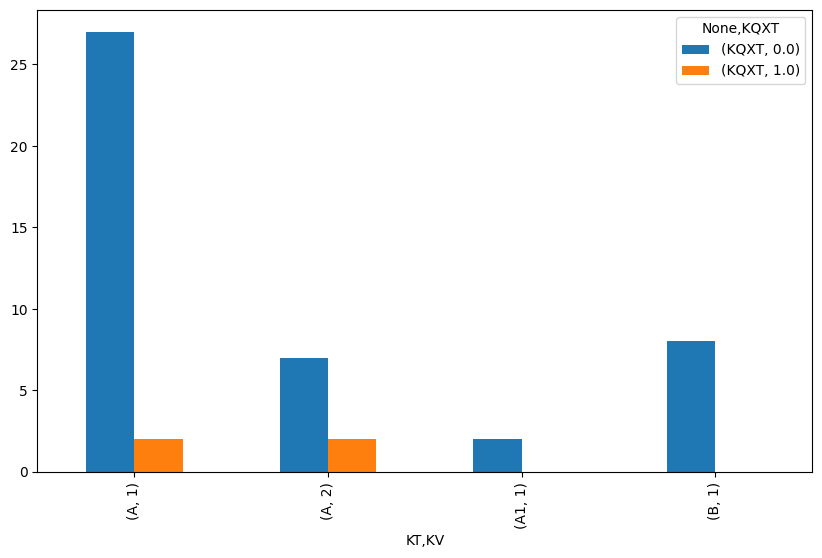

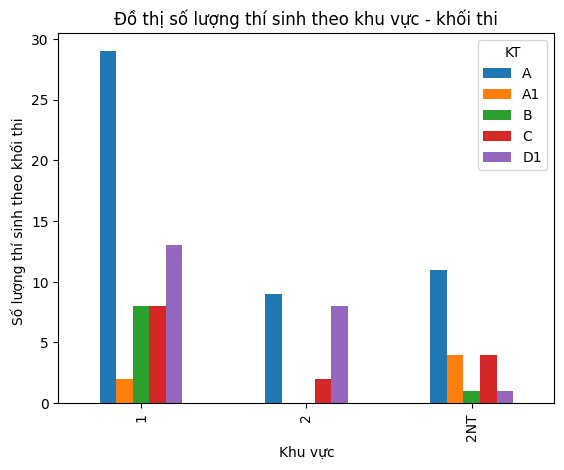

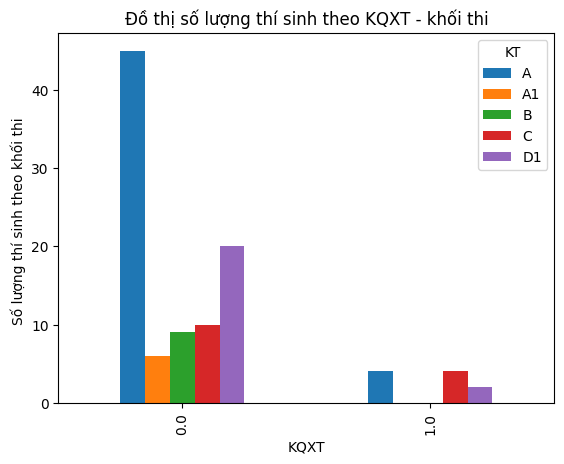

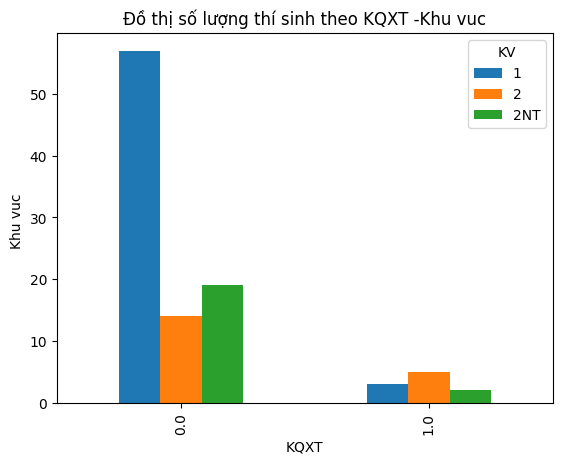

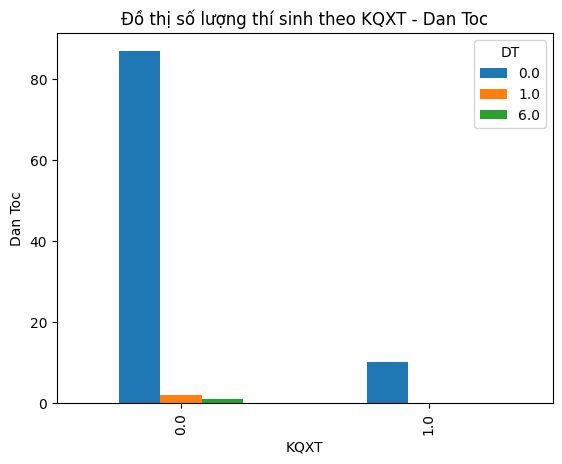

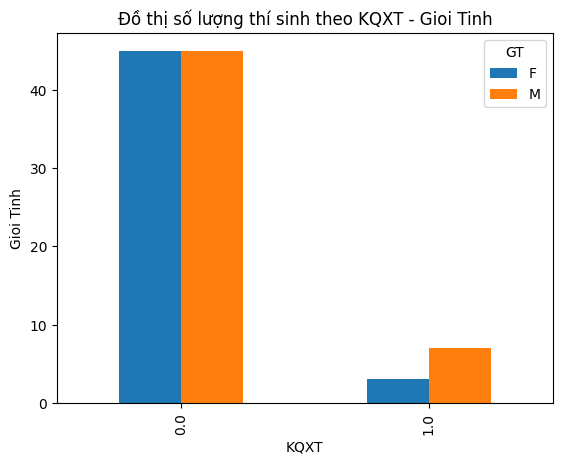

In [4]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc tệp CSV
file_path = "processed_dulieuxettuyendaihoc.csv"
df = pd.read_csv(file_path)


# 1. Trực quan dữ liệu học sinh nữ trên các nhóm XL1, XL2, XL3 dạng unstacked
cau31 = df [ df['GT']=='F'].groupby(['XL1','XL2','XL3'])[['GT']].count()
#dung lenh unstack ( chia dong thanh cot )
cau31.unstack()
print(cau31)
# ve bieu do :
cau31.plot.bar()
plt.show()
#ve bieu do co mau sac
mausac = ['green']
cau31.plot.bar(color=mausac)
plt.show()
# 2. Trực quan dữ liệu KQXT trên nhóm học sinh có khối thi A, A1, B thuộc khu vực 1, 2
#Trực quan dữ liệu KQXT trên nhóm học sinh có khối thi A,A1,B thuộc khu vực 1,2
# => cot KQXT , cot KT , KV
#b1
# chi lay nhung dong nao co khoi thi la A , A1 , B va khu vuc 1,2
cau32 = df[ ( (df["KT"]== 'A') |(df["KT"] == 'A1') | (df["KT"] == 'B'))
                                    & ((df["KV"]=='1') | (df["KV"]=='2') )]
clum = ['KT','KV','KQXT']
print(cau32[clum]) #in ra
#b2 : dem du lieu : vd : KV 1, khoi A , KQXT = 0 thi co bao nhieu gia tri
cau32_count = cau32['KQXT'].value_counts()

cau32_plot = cau32.groupby(['KT','KV','KQXT'])[['KQXT']].count()
cau32_plot.plot.bar()
num_bars = len(cau32_plot)
colors = sns.color_palette("tab10", num_bars)
ax = cau32_plot.unstack().plot(kind='bar', figsize=(10, 6), color=colors)

plt.show()

# # 3. Trực quan dữ liệu số lượng thí sinh từng khu vực dựa trên từng nhóm khối thi
# kv_khoi_counts = df.groupby(['KV', 'Khoi']).size().unstack()
# kv_khoi_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
# plt.xlabel("Khu vực")
# plt.ylabel("Số lượng thí sinh")
# plt.title("Số lượng thí sinh từng khu vực theo khối thi")
# plt.legend(title="Khối thi")
# plt.show()

# # 4. Trực quan dữ liệu số lượng thí sinh đậu, rớt trên từng nhóm khối thi (sử dụng cột 'KT')
# khoi_column = "KT"  # Đảm bảo sử dụng cột đúng
# if khoi_column in df.columns:
#     khoi_kqxt_counts = df.groupby([khoi_column, 'KQXT']).size().unstack()
#     khoi_kqxt_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
#     plt.xlabel("Khối thi")
#     plt.ylabel("Số lượng thí sinh")
#     plt.title("Số lượng thí sinh đậu/rớt theo khối thi")
#     plt.legend(title="Kết quả xét tuyển")
#     plt.show()
# else:
#     print("Không tìm thấy cột 'KT' trong dữ liệu.")

# # 5. Trực quan dữ liệu số lượng thí sinh đậu rớt trên từng nhóm khu vực
# kv_kqxt_counts = df.groupby(['KV', 'KQXT']).size().unstack()
# kv_kqxt_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
# plt.xlabel("Khu vực")
# plt.ylabel("Số lượng thí sinh")
# plt.title("Số lượng thí sinh đậu/rớt theo khu vực")
# plt.legend(title="Kết quả xét tuyển")
# plt.show()

# # 6. Trực quan dữ liệu số lượng thí sinh đậu rớt dựa trên từng nhóm dân tộc
# dt_kqxt_counts = df.groupby(['DT', 'KQXT']).size().unstack()
# dt_kqxt_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
# plt.xlabel("Dân tộc")
# plt.ylabel("Số lượng thí sinh")
# plt.title("Số lượng thí sinh đậu/rớt theo dân tộc")
# plt.legend(title="Kết quả xét tuyển")
# plt.show()

# # 7. Trực quan dữ liệu số lượng thí sinh đậu rớt dựa trên từng nhóm giới tính
# gt_kqxt_counts = df.groupby(['GT', 'KQXT']).size().unstack()
# gt_kqxt_counts.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='coolwarm')
# plt.xlabel("Giới tính")
# plt.ylabel("Số lượng thí sinh")
# plt.title("Số lượng thí sinh đậu/rớt theo giới tính")
# plt.legend(title="Kết quả xét tuyển")
# plt.show()


#cau 3.3
cau33 = df.groupby(['KV','KT']).size().unstack()
cau33.plot.bar()
plt.xlabel('Khu vực')
plt.ylabel('Số lượng thí sinh theo khối thi ')
plt.title('Đồ thị số lượng thí sinh theo khu vực - khối thi')

plt.show()
#cau34
cau34 = df.groupby(['KQXT', 'KT']).size().unstack()
cau34.plot.bar()
plt.xlabel('KQXT')
plt.ylabel('Số lượng thí sinh theo khối thi ')
plt.title('Đồ thị số lượng thí sinh theo KQXT - khối thi')
plt.show()
# Cau 35
cau35 = df.groupby(['KQXT', 'KV']).size().unstack()
cau35.plot.bar()
plt.xlabel('KQXT')
plt.ylabel('Khu vuc ')
plt.title('Đồ thị số lượng thí sinh theo KQXT -Khu vuc')
plt.show()
#Cau 36
cau36 = df.groupby(['KQXT', 'DT']).size().unstack()
cau36.plot.bar()
plt.xlabel('KQXT')
plt.ylabel('Dan Toc')
plt.title('Đồ thị số lượng thí sinh theo KQXT - Dan Toc')
plt.show()
#Cau37
cau37 = df.groupby(['KQXT', 'GT']).size().unstack()
cau37.plot.bar()
plt.xlabel('KQXT')
plt.ylabel('Gioi Tinh')
plt.title('Đồ thị số lượng thí sinh theo KQXT - Gioi Tinh')
plt.show()

Phan 4

Bảng tần số của phanlopt1:
phanlopt1
Trung bình    46
Kém           23
Khá           19
Giỏi          12
Name: count, dtype: int64


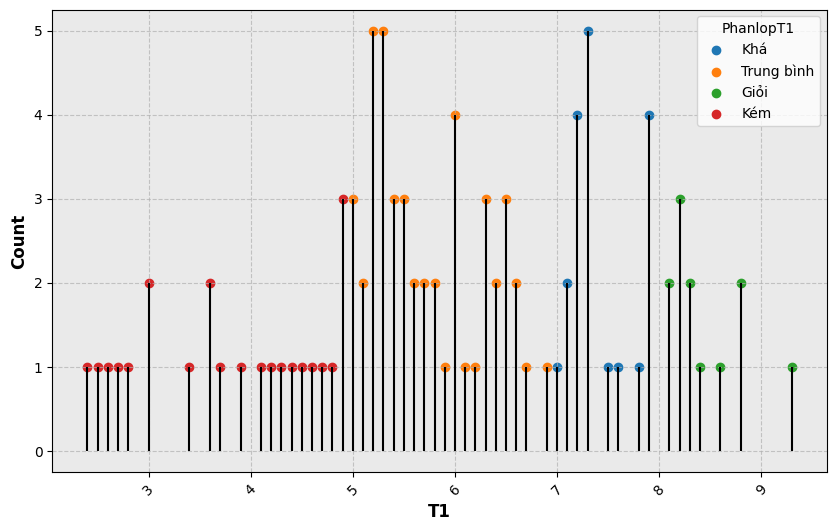

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file CSV
file_path = "processed_dulieuxettuyendaihoc.csv"
df = pd.read_csv(file_path)

# Kiểm tra cột 'T1' có tồn tại không
if 'T1' in df.columns:
    # Tạo biến phân loại 'phanlopt1'
    def categorize_t1(score):
        if score < 5:
            return "Kém"
        elif score < 7:
            return "Trung bình"
        elif score < 8:
            return "Khá"
        else:
            return "Giỏi"

    df['phanlopt1'] = df['T1'].apply(categorize_t1)

    # Lập bảng tần số cho biến 'phanlopt1'
    freq_table = df['phanlopt1'].value_counts()
    print("Bảng tần số của phanlopt1:")
    print(freq_table)

    # Tạo bảng tần số cho T1 theo từng nhóm phanlopt1
    t1_counts = df.groupby(["T1", "phanlopt1"]).size().reset_index(name="Count")


    # Vẽ biểu đồ Drop-line cho biến T1 theo phân loại phanlopt1
    plt.figure(figsize=(10, 6))
    for category in df['phanlopt1'].unique():
        subset = df[df['phanlopt1'] == category]
        counts = subset['T1'].value_counts().sort_index()
        plt.vlines(x=counts.index, ymin=0, ymax=counts.values, colors='black', linestyle='solid')
        plt.scatter(counts.index, counts.values, label=category)

    # Định dạng biểu đồ
    plt.xlabel("T1", fontsize=12, fontweight='bold')
    plt.ylabel("Count", fontsize=12, fontweight='bold')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.gca().set_facecolor("#EAEAEA")  # Đặt nền màu xám nhẹ

    # Hiển thị biểu đồ
    plt.legend(title="PhanlopT1")
    plt.show()
else:
    print("Không tìm thấy cột 'T1' trong dữ liệu.")

Phan 5

Bảng tần số của phanlopt1:
phanlopt1
Trung bình    46
Kém           23
Khá           19
Giỏi          12
Name: count, dtype: int64


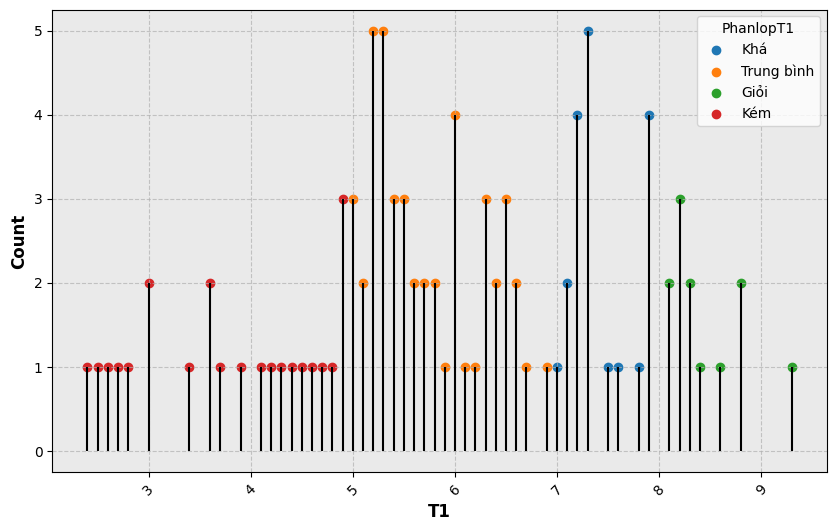

Mô tả thống kê của T1:
count    100.000000
mean       5.946000
std        1.608338
min        2.400000
25%        5.000000
50%        5.850000
75%        7.200000
max        9.300000
Name: T1, dtype: float64


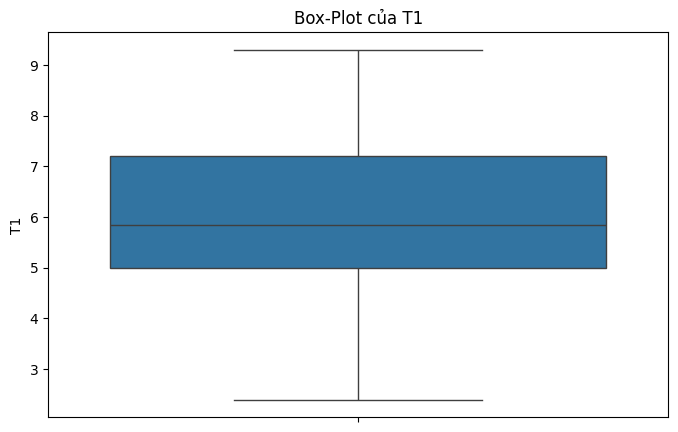

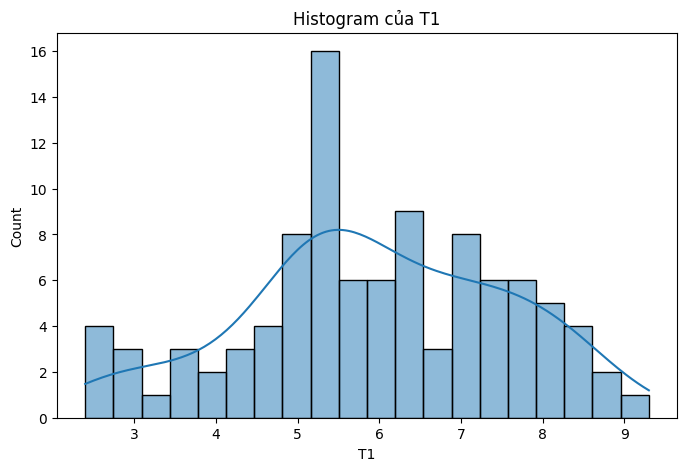

Mức độ lệch: -0.17824317486762223
Mức độ nhọn: -0.48010360836580634


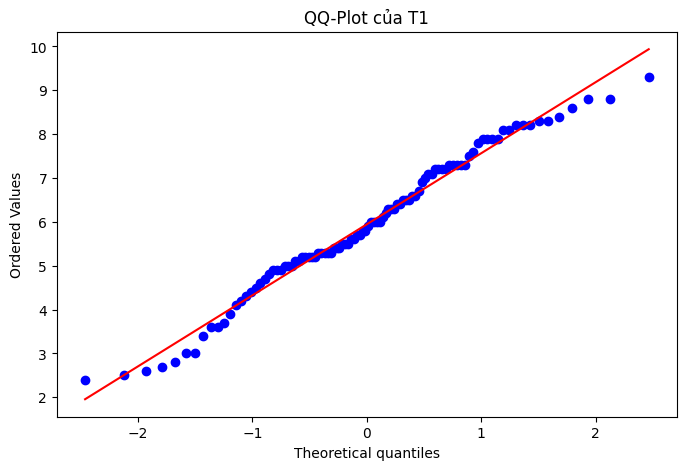

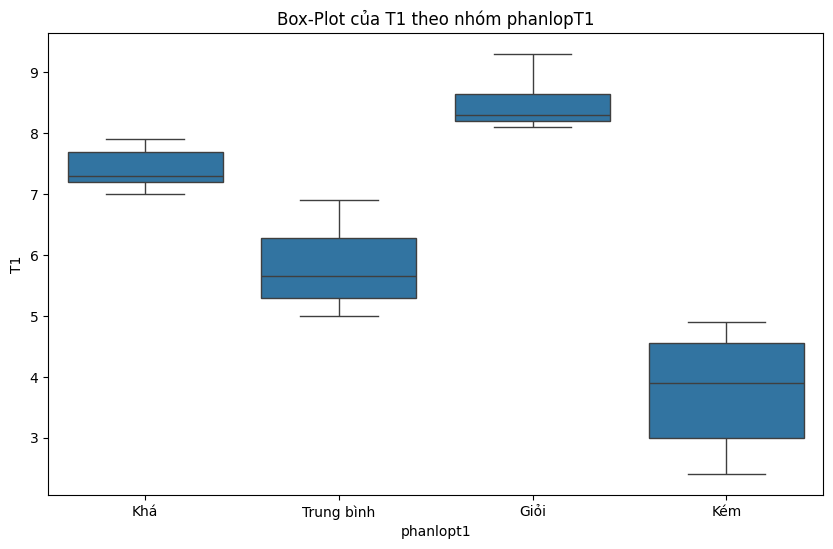

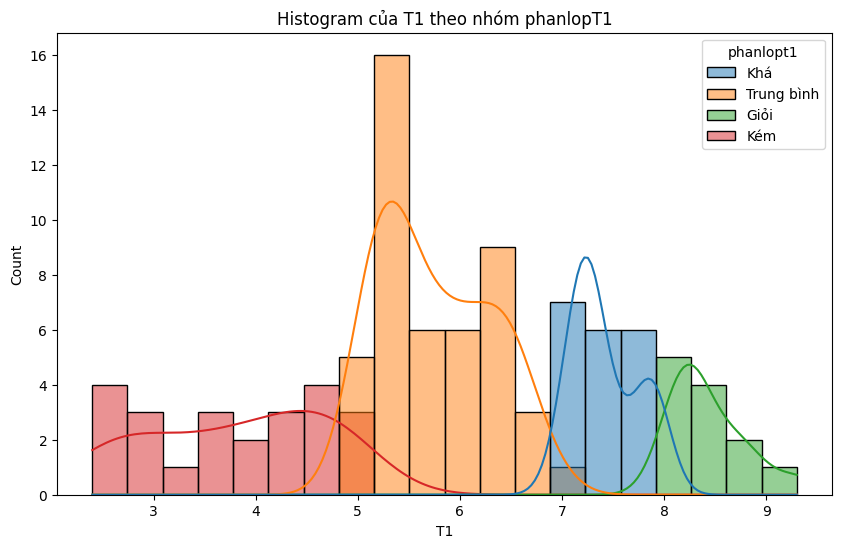

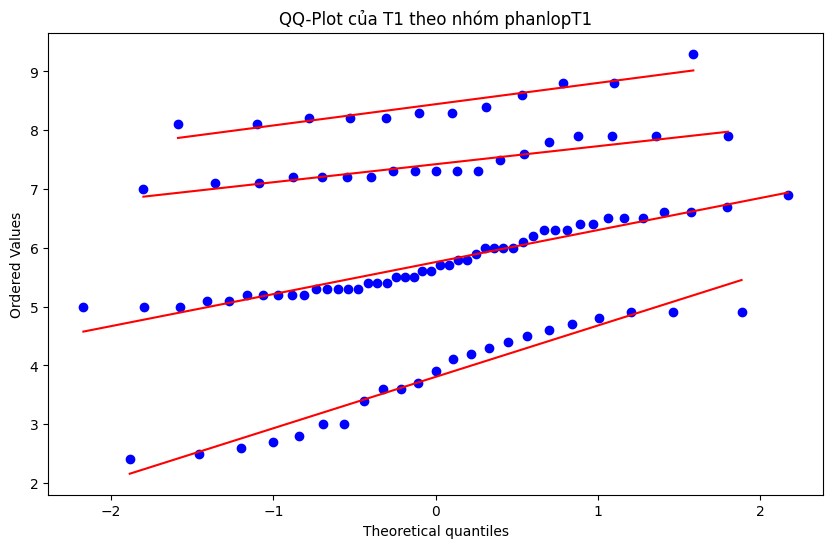

Hệ số tương quan giữa T1 và DH1: 0.04925439216104156


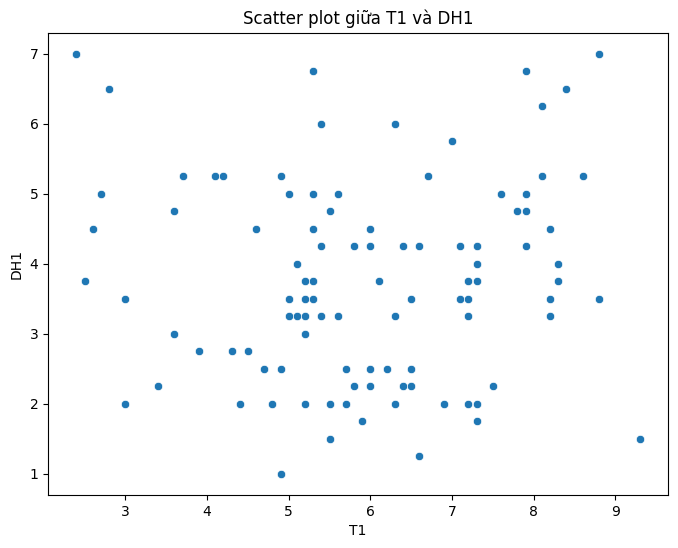

Ma trận tương quan giữa DH1, DH2, DH3:
          DH1       DH2       DH3
DH1  1.000000  0.035154  0.018731
DH2  0.035154  1.000000 -0.091523
DH3  0.018731 -0.091523  1.000000


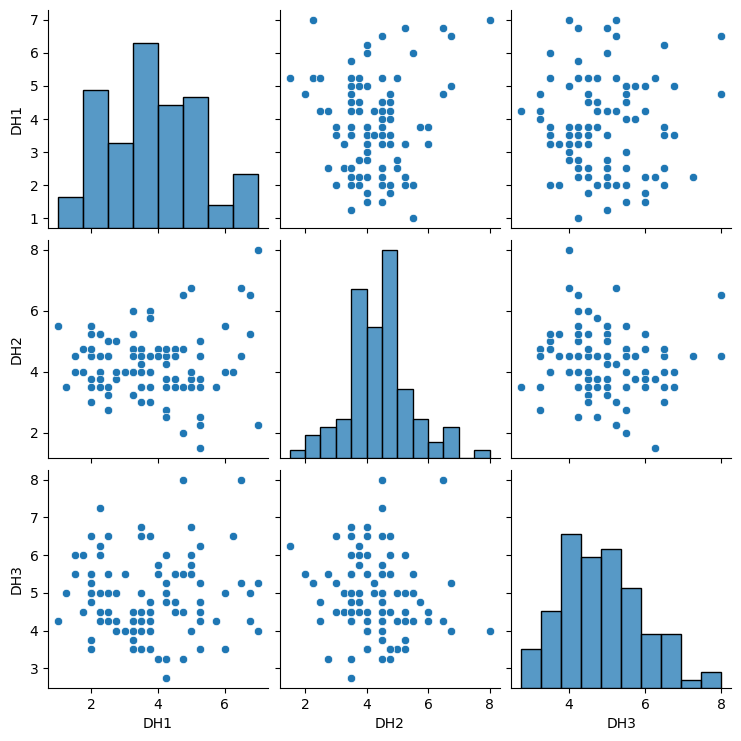

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Đọc dữ liệu từ file CSV
file_path = "processed_dulieuxettuyendaihoc.csv"
df = pd.read_csv(file_path)

# Kiểm tra cột 'T1' có tồn tại không
if 'T1' in df.columns:
    # Tạo biến phân loại 'phanlopt1'
    def categorize_t1(score):
        if score < 5:
            return "Kém"
        elif score < 7:
            return "Trung bình"
        elif score < 8:
            return "Khá"
        else:
            return "Giỏi"

    df['phanlopt1'] = df['T1'].apply(categorize_t1)

    # Lập bảng tần số cho biến 'phanlopt1'
    freq_table = df['phanlopt1'].value_counts()
    print("Bảng tần số của phanlopt1:")
    print(freq_table)

    # Vẽ biểu đồ Drop-line cho biến T1 theo phân loại phanlopt1
    plt.figure(figsize=(10, 6))
    for category in df['phanlopt1'].unique():
        subset = df[df['phanlopt1'] == category]
        counts = subset['T1'].value_counts().sort_index()
        plt.vlines(x=counts.index, ymin=0, ymax=counts.values, colors='black', linestyle='solid')
        plt.scatter(counts.index, counts.values, label=category)

    # Định dạng biểu đồ
    plt.xlabel("T1", fontsize=12, fontweight='bold')
    plt.ylabel("Count", fontsize=12, fontweight='bold')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.gca().set_facecolor("#EAEAEA")  # Đặt nền màu xám nhẹ

    # Hiển thị biểu đồ
    plt.legend(title="PhanlopT1")
    plt.show()

    # Mô tả độ tập trung và phân tán của T1
    print("Mô tả thống kê của T1:")
    print(df['T1'].describe())

    # Vẽ Box-Plot cho biến T1
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df['T1'])
    plt.title("Box-Plot của T1")
    plt.show()

    # Vẽ Histogram biểu thị hình dáng phân phối
    plt.figure(figsize=(8, 5))
    sns.histplot(df['T1'], kde=True, bins=20)
    plt.title("Histogram của T1")
    plt.show()

    # Kiểm tra mức độ lệch và nhọn
    skewness = df['T1'].skew()
    kurtosis = df['T1'].kurtosis()
    print(f"Mức độ lệch: {skewness}")
    print(f"Mức độ nhọn: {kurtosis}")

    # Kiểm chứng phân phối chuẩn bằng QQ-Plot
    plt.figure(figsize=(8, 5))
    stats.probplot(df['T1'], dist="norm", plot=plt)
    plt.title("QQ-Plot của T1")
    plt.show()

    #2.  Mô tả và khảo sát phân phối cho biến T1 trên từng nhóm phanlopT1
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['phanlopt1'], y=df['T1'])
    plt.title("Box-Plot của T1 theo nhóm phanlopT1")
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='T1', hue='phanlopt1', kde=True, bins=20)
    plt.title("Histogram của T1 theo nhóm phanlopT1")
    plt.show()

    plt.figure(figsize=(10, 6))
    for category in df['phanlopt1'].unique():
        subset = df[df['phanlopt1'] == category]['T1']
        stats.probplot(subset, dist="norm", plot=plt)
    plt.title("QQ-Plot của T1 theo nhóm phanlopT1")
    plt.show()

    #3,4 . Khảo sát tương quan giữa DH1 và T1
    if 'DH1' in df.columns:
        correlation = df[['T1', 'DH1']].corr().iloc[0, 1]
        print(f"Hệ số tương quan giữa T1 và DH1: {correlation}")

        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=df['T1'], y=df['DH1'])
        plt.title("Scatter plot giữa T1 và DH1")
        plt.show()

    #5.  Khảo sát tương quan giữa DH1, DH2, DH3
    if {'DH1', 'DH2', 'DH3'}.issubset(df.columns):
        corr_matrix = df[['DH1', 'DH2', 'DH3']].corr()
        print("Ma trận tương quan giữa DH1, DH2, DH3:")
        print(corr_matrix)

        sns.pairplot(df[['DH1', 'DH2', 'DH3']])
        plt.show()
else:
    print("Không tìm thấy cột 'T1' trong dữ liệu.")